In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_excel("Data2.xlsx")
dataset.head(4)

,SN,Amount,Month,Monthofpayment,Date,Modeofpayment,PaymentOn,Remarks,Amount1,Amount2
0,1,10000.0,Falgun,Chaitra,2024-04-08,Esewa,Esewa - 9851196678,NaN,10000,10000.0
1,2,10000.0,Chaitra,NaN,2024-04-08,NaN,Esewa - 9851196678,NaN,500,10000.0
2,3,NaN,Bhaisakh,Jestha,NaT,Nic Asia,NaN,NaN,14000,NaN
3,4,5000.0,NaN,Shrawan,2024-07-22,NaN,Esewa - 9851196678,NaN,5000,5000.0


In [3]:
dataset.describe()

,SN,Amount,Date,Amount1,Amount2
count,117.000000,97.000000,91,117.000000,79.00000
mean,59.000000,11494.845361,2030-01-18 02:22:25.054945024,13418.384615,12031.64557
min,1.000000,500.000000,2024-04-08 00:00:00,500.000000,500.00000
25%,30.000000,10000.000000,2024-05-07 00:00:00,10000.000000,10000.00000
50%,59.000000,12000.000000,2024-06-26 00:00:00,12000.000000,12000.00000
75%,88.000000,12000.000000,2024-08-23 00:00:00,12000.000000,12000.00000
max,117.000000,50000.000000,2080-11-07 00:00:00,80000.000000,80000.00000
std,33.919021,4492.757392,NaN,11127.075241,9914.16423


In [4]:
dataset.isnull().sum()

SN                 0
Amount            20
Month             23
Monthofpayment    22
Date              26
Modeofpayment     23
PaymentOn         29
Remarks           53
Amount1            0
Amount2           38
dtype: int64

In [5]:
dataset.describe()

,SN,Amount,Date,Amount1,Amount2
count,117.000000,97.000000,91,117.000000,79.00000
mean,59.000000,11494.845361,2030-01-18 02:22:25.054945024,13418.384615,12031.64557
min,1.000000,500.000000,2024-04-08 00:00:00,500.000000,500.00000
25%,30.000000,10000.000000,2024-05-07 00:00:00,10000.000000,10000.00000
50%,59.000000,12000.000000,2024-06-26 00:00:00,12000.000000,12000.00000
75%,88.000000,12000.000000,2024-08-23 00:00:00,12000.000000,12000.00000
max,117.000000,50000.000000,2080-11-07 00:00:00,80000.000000,80000.00000
std,33.919021,4492.757392,NaN,11127.075241,9914.16423


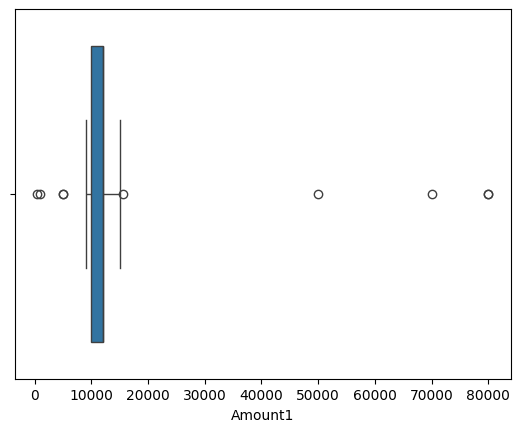

In [9]:
sns.boxplot(x = "Amount1",data=dataset)
plt.show()

In [12]:
q1 = dataset["Amount1"].quantile(0.25)
q3 = dataset["Amount2"].quantile(0.75)

In [13]:
q1

np.float64(10000.0)

In [14]:
q3

np.float64(12000.0)

In [16]:
IQR = q3-q1
IQR

np.float64(2000.0)

In [17]:
min_range = q1-(1.5*IQR)
max_range = q3+(1.5*IQR)

In [18]:
min_range, max_range

(np.float64(7000.0), np.float64(15000.0))

In [28]:
new_dataset=dataset[dataset["Amount1"]<=max_range]

In [20]:
new_dataset.shape

(112, 10)

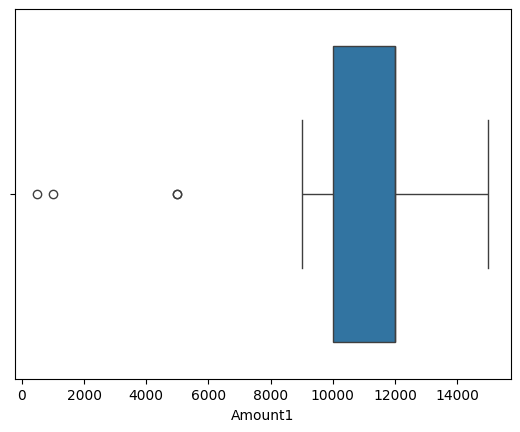

In [21]:
sns.boxplot(x = "Amount1",data=new_dataset)
plt.show()

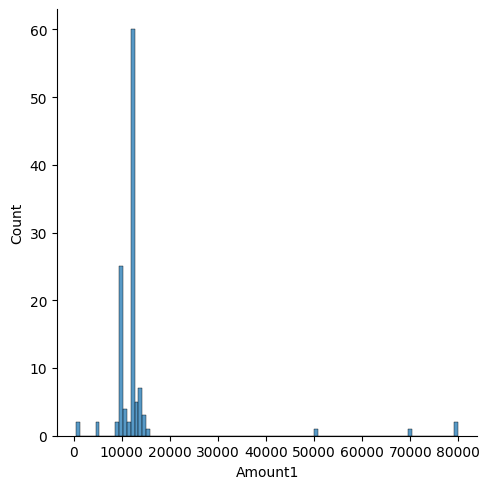

In [30]:
sns.displot(dataset["Amount1"])

In [33]:
min_rang=dataset["Amount1"].mean() - (3*dataset["Amount1"].std())
max_rang=dataset["Amount1"].mean() + (3*dataset["Amount1"].std())

In [34]:
min_rang, max_rang

(np.float64(-19962.841108896966), np.float64(46799.6103396662))

In [35]:
z_score=(dataset["Amount1"]-(dataset["Amount1"].mean()))/(dataset["Amount1"].std())
z_score

0     -0.307213
1     -1.160987
2      0.052270
3     -0.756568
4     -0.037601
         ...   
112   -0.307213
113   -0.194605
114   -0.307213
115   -0.077144
116   -0.307213
Name: Amount1, Length: 117, dtype: float64

In [36]:
z_score>3

0      False
1      False
2      False
3      False
4      False
       ...  
112    False
113    False
114    False
115    False
116    False
Name: Amount1, Length: 117, dtype: bool

In [37]:
dataset["z_score"] = z_score

In [38]:
dataset

,SN,Amount,Month,Monthofpayment,Date,Modeofpayment,PaymentOn,Remarks,Amount1,Amount2,z_score
0,1,10000.0,Falgun,Chaitra,2024-04-08,Esewa,Esewa - 9851196678,NaN,10000,10000.0,-0.307213
1,2,10000.0,Chaitra,NaN,2024-04-08,NaN,Esewa - 9851196678,NaN,500,10000.0,-1.160987
2,3,NaN,Bhaisakh,Jestha,NaT,Nic Asia,NaN,NaN,14000,NaN,0.052270
3,4,5000.0,NaN,Shrawan,2024-07-22,NaN,Esewa - 9851196678,NaN,5000,5000.0,-0.756568
4,5,10000.0,Ashadh,Shrawan,2024-07-22,Machhapuchre,NaN,NaN,13000,10000.0,-0.037601
...,...,...,...,...,...,...,...,...,...,...,...
112,113,10000.0,Bhaisakh,Jestha,NaT,NaN,NaN,NaN,10000,10000.0,-0.307213
113,114,5000.0,Jestha,NaN,2024-07-22,Machhapuchre,Esewa - 9851196678,NaN,11253,5000.0,-0.194605
114,115,13000.0,NaN,Shrawan,NaT,Machhapuchre,NaN,NaN,10000,10000.0,-0.307213
115,116,NaN,Shrawan,Bhadra,2024-08-23,NaN,Esewa - 9851196678,NaN,12560,NaN,-0.077144


In [39]:
dataset[dataset["z_score"]<3]

,SN,Amount,Month,Monthofpayment,Date,Modeofpayment,PaymentOn,Remarks,Amount1,Amount2,z_score
0,1,10000.0,Falgun,Chaitra,2024-04-08,Esewa,Esewa - 9851196678,NaN,10000,10000.0,-0.307213
1,2,10000.0,Chaitra,NaN,2024-04-08,NaN,Esewa - 9851196678,NaN,500,10000.0,-1.160987
2,3,NaN,Bhaisakh,Jestha,NaT,Nic Asia,NaN,NaN,14000,NaN,0.052270
3,4,5000.0,NaN,Shrawan,2024-07-22,NaN,Esewa - 9851196678,NaN,5000,5000.0,-0.756568
4,5,10000.0,Ashadh,Shrawan,2024-07-22,Machhapuchre,NaN,NaN,13000,10000.0,-0.037601
...,...,...,...,...,...,...,...,...,...,...,...
112,113,10000.0,Bhaisakh,Jestha,NaT,NaN,NaN,NaN,10000,10000.0,-0.307213
113,114,5000.0,Jestha,NaN,2024-07-22,Machhapuchre,Esewa - 9851196678,NaN,11253,5000.0,-0.194605
114,115,13000.0,NaN,Shrawan,NaT,Machhapuchre,NaN,NaN,10000,10000.0,-0.307213
115,116,NaN,Shrawan,Bhadra,2024-08-23,NaN,Esewa - 9851196678,NaN,12560,NaN,-0.077144
